# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | Before my flight, I was forced ..."
1,✅ Trip Verified | British Airways at its bes...
2,✅ Trip Verified | An excellent flight! Despite...
3,✅ Trip Verified | I recently traveled with Bri...
4,✅ Trip Verified | My family and I were booke...


In [4]:
df.to_csv("data.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,"Not Verified | Before my flight, I was forced ..."
1,✅ Trip Verified | British Airways at its bes...
2,✅ Trip Verified | An excellent flight! Despite...
3,✅ Trip Verified | I recently traveled with Bri...
4,✅ Trip Verified | My family and I were booke...
...,...
995,✅ Trip Verified | London to Seoul. Nightmare e...
996,Not Verified | London to Vancouver. Economy w...
997,❎ Not Verified | Newcastle to Delhi via London...
998,✅ Trip Verified | Miami to Delhi via London. ...


Removing the parts before | in the reviews column

In [6]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [7]:
df.head()

,reviews
0,"Before my flight, I was forced by the ground ..."
1,British Airways at its best. Outstanding se...
2,An excellent flight! Despite this being a 4.5...
3,I recently traveled with British Airways and ...
4,My family and I were booked to leave London...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# **Step 1: Cleaning the text**

In [8]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...
1,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...
2,An excellent flight! Despite this being a 4.5...,An excellent flight Despite this being a hour...
3,I recently traveled with British Airways and ...,I recently traveled with British Airways and ...
4,My family and I were booked to leave London...,My family and I were booked to leave London f...


# **Step 2: Tokenization**
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# **Step 3: Enrichment – POS tagging**
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# **Step 4: Stopwords removal**
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# **Step 5: Obtaining the stem words**
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [9]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...,"[(flight, n), (forced, v), (ground, n), (staff..."
1,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...,"[(British, a), (Airways, n), (best, a), (Outst..."
2,An excellent flight! Despite this being a 4.5...,An excellent flight Despite this being a hour...,"[(excellent, a), (flight, n), (Despite, None),..."
3,I recently traveled with British Airways and ...,I recently traveled with British Airways and ...,"[(recently, r), (traveled, v), (British, n), (..."
4,My family and I were booked to leave London...,My family and I were booked to leave London f...,"[(family, n), (booked, v), (leave, v), (London..."


In [11]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...,"[(flight, n), (forced, v), (ground, n), (staff...",flight force ground staff check new expensiv...
1,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...,"[(British, a), (Airways, n), (best, a), (Outst...",British Airways best Outstanding service fli...
2,An excellent flight! Despite this being a 4.5...,An excellent flight Despite this being a hour...,"[(excellent, a), (flight, n), (Despite, None),...",excellent flight Despite hour flight configu...
3,I recently traveled with British Airways and ...,I recently traveled with British Airways and ...,"[(recently, r), (traveled, v), (British, n), (...",recently travel British Airways mixed experi...
4,My family and I were booked to leave London...,My family and I were booked to leave London f...,"[(family, n), (booked, v), (leave, v), (London...",family book leave London Hong Kong August ma...


In [12]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"Before my flight, I was forced by the ground ...",flight force ground staff check new expensiv...
1,British Airways at its best. Outstanding se...,British Airways best Outstanding service fli...
2,An excellent flight! Despite this being a 4.5...,excellent flight Despite hour flight configu...
3,I recently traveled with British Airways and ...,recently travel British Airways mixed experi...
4,My family and I were booked to leave London...,family book leave London Hong Kong August ma...
...,...,...
995,London to Seoul. Nightmare experience with Br...,London Seoul Nightmare experience British Ai...
996,London to Vancouver. Economy was a lot more ...,London Vancouver Economy lot cramp expect BA...
997,"Newcastle to Delhi via London. At check-in , ...",Newcastle Delhi via London check charge carr...
998,Miami to Delhi via London. The BA business ...,Miami Delhi via London BA business class fly...


# **Sentiment Analysis using VADER**
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [13]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:00


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...,"[(flight, n), (forced, v), (ground, n), (staff...",flight force ground staff check new expensiv...,-0.6309,Negative
1,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...,"[(British, a), (Airways, n), (best, a), (Outst...",British Airways best Outstanding service fli...,0.9773,Positive
2,An excellent flight! Despite this being a 4.5...,An excellent flight Despite this being a hour...,"[(excellent, a), (flight, n), (Despite, None),...",excellent flight Despite hour flight configu...,0.9940,Positive
3,I recently traveled with British Airways and ...,I recently traveled with British Airways and ...,"[(recently, r), (traveled, v), (British, n), (...",recently travel British Airways mixed experi...,-0.6945,Negative
4,My family and I were booked to leave London...,My family and I were booked to leave London f...,"[(family, n), (booked, v), (leave, v), (London...",family book leave London Hong Kong August ma...,-0.8689,Negative


In [15]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,468
Negative,422
Neutral,110


([<matplotlib.patches.Wedge at 0x7cee20a2ee90>,
 [Text(0.11039790437095814, 1.0944461168602595, 'Positive'),
  Text(-0.47460171119818745, -0.9923473261553902, 'Negative'),
  Text(1.2701889961293427, -0.45729630887634853, 'Neutral')],
 [Text(0.06021703874779535, 0.5969706091965051, '46.8%'),
  Text(-0.25887366065355677, -0.5412803597211219, '42.2%'),
  Text(0.799748627192549, -0.287927305588812, '11.0%')])

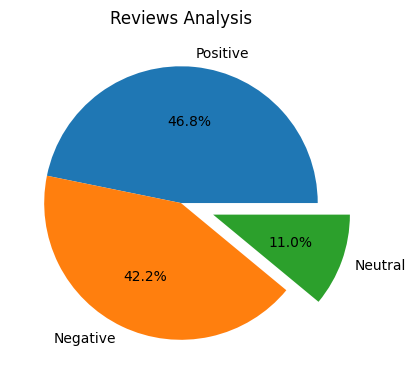

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [17]:
df.to_csv("British-Airways-reviews.csv")

# **Wordcloud**
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

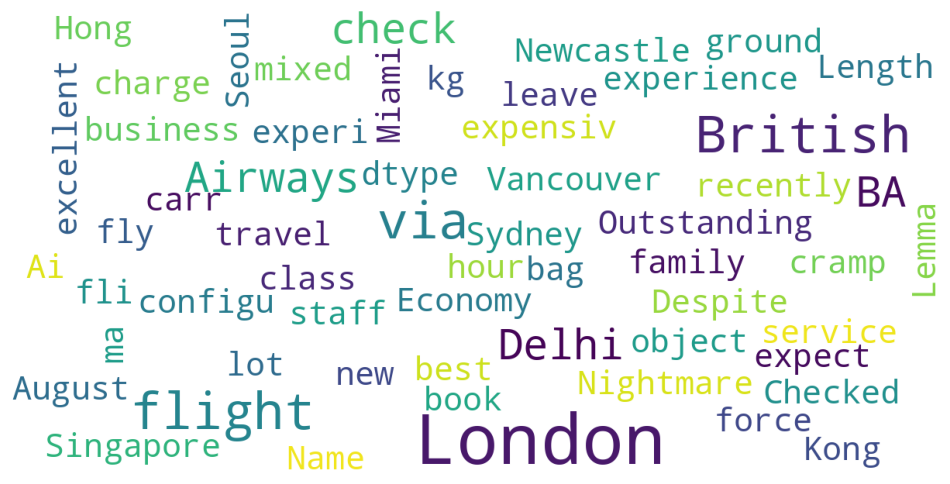

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

# **Data Visualization / EDA**

Data quality profiling and exploratory data analysis are crucial steps in the process of Data Science and Machine Learning development. YData-profiling is a leading tool in the data understanding step of the data science workflow as a pioneering Python package.

ydata-profiling is a leading package for data profiling, that automates and standardizes the generation of detailed reports, complete with statistics and visualizations.

In [19]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=18a258d27a8c156230f3fde8192cdd0da23cd2987e0dc1a9292b883773c6834b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [20]:
from ydata_profiling import ProfileReport
import pandas as pd

In [21]:
df=pd.read_csv("British-Airways-reviews.csv")

In [22]:
profile = ProfileReport(df, title="Profiling Report")

In [23]:
# Save the report to HTML file
profile.to_file("BA-report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
profile